# Solutions 2 - Examples in Eigenvalue Decomposition

## Assignment 1

In [1]:
# Pkg.add("MatrixMarket")
using MatrixMarket

In [2]:
varinfo(MatrixMarket)

| name         |       size | summary         |
|:------------ | ----------:|:--------------- |
| MatrixMarket | 22.007 KiB | Module          |
| mmread       |    0 bytes | typeof(mmread)  |
| mmwrite      |    0 bytes | typeof(mmwrite) |


In [3]:
#############################################################
# Download and parse every file from the NIST Matrix Market #
#############################################################

#Convenience function to emulate the behavior of gunzip
using GZip
function gunzip(fname)
    destname, ext = splitext(fname)
    if ext != ".gz"
        error("gunzip: $fname: unknown suffix -- ignored")
    end
    open(destname, "w") do f
        GZip.open(fname) do g
            write(f, string(g))
        end
    end
    destname
end

#Download and parse master list of matrices
if !isfile("matrices.html")
    download("http://math.nist.gov/MatrixMarket/matrices.html", "matrices.html")
end

matrixmarketdata = Any[]
open("matrices.html") do f
   for line in readlines(f)
       if occursin("""<A HREF="/MatrixMarket/data/""",line)
           collectionname, setname, matrixname = split(split(line, '"')[2], '/')[4:6]
           matrixname = split(matrixname, '.')[1]
           push!(matrixmarketdata, (collectionname, setname, matrixname) )
       end
   end
end

#Download one matrix at random
n = rand(1:length(matrixmarketdata))
for (collectionname, setname, matrixname) in matrixmarketdata[n:n]
    fn = string(collectionname, '_', setname, '_', matrixname)
    mtxfname = string(fn, ".mtx")
    if !isfile(mtxfname)
        url = "ftp://math.nist.gov/pub/MatrixMarket2/$collectionname/$setname/$matrixname.mtx.gz"
        gzfname = string(fn, ".mtx.gz")
        try
            download(url, gzfname)
        catch
            continue
        end
        gunzip(gzfname)
    end
end

In [4]:
readdir()

27-element Array{String,1}:
 ".ipynb_checkpoints"                                                                     
 "Harwell-Boeing_bcsstruc1_bcsstk11.mtx"                                                  
 "L3a Eigenvalue Decomposition - Definitions and Facts.ipynb"                             
 "L3b Eigenvalue Decomposition - Perturbation Theory.ipynb"                               
 "L4a Symmetric Eigenvalue Decomposition - Algorithms and Error Analysis.ipynb"           
 "L4b Symmetric Eigenvalue Decomposition - Algorithms for Tridiagonal Matrices.ipynb"     
 "L4c Symmetric Eigenvalue Decomposition - Jacobi Method and High Relative Accuracy.ipynb"
 "L4d Symmetric Eigenvalue Decomposition - Lanczos Method.ipynb"                          
 "L5a Singular Value Decomposition - Definitions and Facts .ipynb"                        
 "L5b Singular Value Decomposition - Perturbation Theory .ipynb"                          
 "L6a Singular Value Decomposition - Algorithms and Error Anal

In [5]:
A=mmread("Harwell-Boeing_bcsstruc1_bcsstk11.mtx")

1473×1473 SparseArrays.SparseMatrixCSC{Float64,Int64} with 34241 stored entries:
  [1   ,    1]  =  1.01185e6
  [2   ,    1]  =  4.11009e6
  [3   ,    1]  =  -4.47035e-8
  [4   ,    1]  =  -3.11976e5
  [5   ,    1]  =  -1.18472e6
  [6   ,    1]  =  9.31323e-9
  [52  ,    1]  =  22135.0
  [53  ,    1]  =  90321.0
  [54  ,    1]  =  -18909.1
  [55  ,    1]  =  -1.4405e5
  [56  ,    1]  =  -5.47026e5
  [57  ,    1]  =  3.58351e5
  ⋮
  [1414, 1473]  =  3.58351e5
  [1415, 1473]  =  -1.36083e6
  [1416, 1473]  =  -2.28427e6
  [1420, 1473]  =  18909.1
  [1421, 1473]  =  4631.25
  [1422, 1473]  =  -5.29354e6
  [1465, 1473]  =  -1.02445e-8
  [1466, 1473]  =  3.35276e-8
  [1467, 1473]  =  7.58227e5
  [1471, 1473]  =  6.33299e-8
  [1472, 1473]  =  -2.6077e-7
  [1473, 1473]  =  1.82401e7

In [6]:
size(A)

(1473, 1473)

In [7]:
using LinearAlgebra

In [8]:
issymmetric(A)

true

In [9]:
cond(Matrix(A))

2.2118529795503265e8

In [10]:
using Plots
using SparseArrays

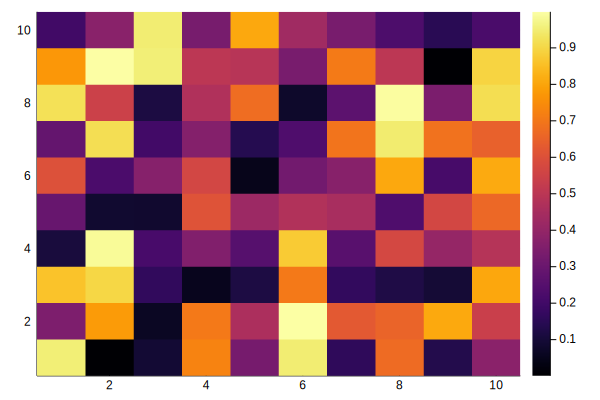

In [12]:
# Plot of a small random matrix, for illustration
B=rand(10,10)
spy(sparse(B))
heatmap(B)

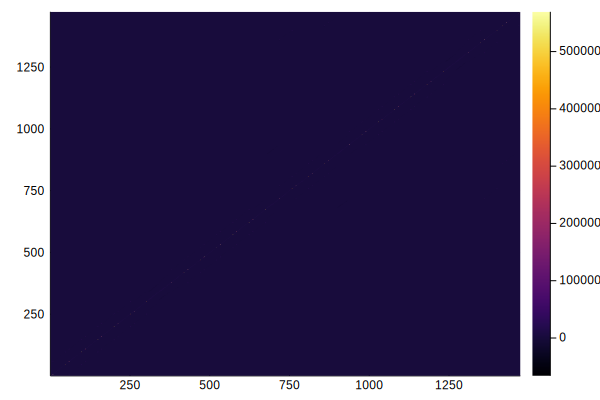

In [13]:
# Now our matrix - Wait!
heatmap(A)

## Assignment 2

In [14]:
using MatrixDepot

include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


In [15]:
varinfo(MatrixDepot)

| name         |      size | summary                                        |
|:------------ | ---------:|:---------------------------------------------- |
| @addgroup    |   0 bytes | getfield(MatrixDepot, Symbol("#@addgroup"))    |
| @modifygroup |   0 bytes | getfield(MatrixDepot, Symbol("#@modifygroup")) |
| @pred        |   0 bytes | getfield(MatrixDepot, Symbol("#@pred"))        |
| @rmgroup     |   0 bytes | getfield(MatrixDepot, Symbol("#@rmgroup"))     |
| MatrixDepot  | 2.332 MiB | Module                                         |
| builtin      |   0 bytes | typeof(builtin)                                |
| hasdata      |   0 bytes | typeof(hasdata)                                |
| isboolean    |   0 bytes | typeof(isboolean)                              |
| isbuiltin    |   0 bytes | typeof(isbuiltin)                              |
| iscomplex    |   0 bytes | typeof(iscomplex)                              |
| isgeneral    |   0 bytes | typeof(isgeneral)                              |
| ishermitian  |   0 bytes | typeof(ishermitian)                            |
| isinteger    |   0 bytes | typeof(isinteger)                              |
| isloaded     |   0 bytes | typeof(isloaded)                               |
| islocal      |   0 bytes | typeof(islocal)                                |
| isreal       |   0 bytes | typeof(isreal)                                 |
| isremote     |   0 bytes | typeof(isremote)                               |
| isskew       |   0 bytes | typeof(isskew)                                 |
| issymmetric  |   0 bytes | typeof(issymmetric)                            |
| isunloaded   |   0 bytes | typeof(isunloaded)                             |
| isuser       |   0 bytes | typeof(isuser)                                 |
| keyword      |   0 bytes | typeof(keyword)                                |
| listdata     |   0 bytes | typeof(listdata)                               |
| listdir      |   0 bytes | typeof(listdir)                                |
| listgroups   |   0 bytes | typeof(listgroups)                             |
| listnames    |   0 bytes | typeof(listnames)                              |
| logical      |   0 bytes | typeof(logical)                                |
| matrixdepot  |   0 bytes | typeof(matrixdepot)                            |
| mdinfo       |   0 bytes | typeof(mdinfo)                                 |
| mdlist       |   0 bytes | typeof(mdlist)                                 |
| mdopen       |   0 bytes | typeof(mdopen)                                 |
| metasymbols  |   0 bytes | typeof(metasymbols)                            |
| mm           |   0 bytes | typeof(mm)                                     |
| sp           |   0 bytes | typeof(sp)                                     |
| user         |   0 bytes | typeof(user)                                   |


In [16]:
mdinfo()

### Currently loaded Matrices

| builtin(#)  |             |              |             |               |
|:----------- |:----------- |:------------ |:----------- |:------------- |
| 1 baart     | 13 fiedler  | 25 invhilb   | 37 parter   | 49 shaw       |
| 2 binomial  | 14 forsythe | 26 invol     | 38 pascal   | 50 smallworld |
| 3 blur      | 15 foxgood  | 27 kahan     | 39 pei      | 51 spikes     |
| 4 cauchy    | 16 frank    | 28 kms       | 40 phillips | 52 toeplitz   |
| 5 chebspec  | 17 gilbert  | 29 lehmer    | 41 poisson  | 53 tridiag    |
| 6 chow      | 18 golub    | 30 lotkin    | 42 prolate  | 54 triw       |
| 7 circul    | 19 gravity  | 31 magic     | 43 randcorr | 55 ursell     |
| 8 clement   | 20 grcar    | 32 minij     | 44 rando    | 56 vand       |
| 9 companion | 21 hadamard | 33 moler     | 45 randsvd  | 57 wathen     |
| 10 deriv2   | 22 hankel   | 34 neumann   | 46 rohess   | 58 wilkinson  |
| 11 dingdong | 23 heat     | 35 oscillate | 47 rosser   | 59 wing       |
| 12 erdrey   | 24 hilb     | 36 parallax  | 48 sampling |               |

| user(#) |
|:------- |

| Groups  |       |       |         |        |         |           |     |     |     |     |     |
|:------- |:----- |:----- |:------- |:------ |:------- |:--------- |:--- |:--- |:--- |:--- |:--- |
| all     | local | eigen | illcond | posdef | regprob | symmetric |     |     |     |     |     |
| builtin | user  | graph | inverse | random | sparse  |           |     |     |     |     |     |

| Suite Sparse | of   |
|:------------ |:---- |
| 0            | 2833 |

| MatrixMarket | of  |
|:------------ |:--- |
| 0            | 498 |


In [17]:
listnames(:eigen)

| list(23) |          |          |          |           |         |          |           |     |     |     |
|:-------- |:-------- |:-------- |:-------- |:--------- |:------- |:-------- |:--------- |:--- |:--- |:--- |
| chebspec | clement  | forsythe | hadamard | minij     | parter  | rosser   | wathen    |     |     |     |
| chow     | dingdong | frank    | invol    | neumann   | pascal  | sampling | wilkinson |     |     |     |
| circul   | fiedler  | grcar    | lotkin   | oscillate | poisson | tridiag  |           |     |     |     |


In [18]:
mdlist(:sparse & :symmetric)

2-element Array{String,1}:
 "poisson"
 "wathen" 

In [19]:
A=matrixdepot("fiedler",100)

100×100 Array{Float64,2}:
  0.0   1.0   2.0   3.0   4.0   5.0  …  94.0  95.0  96.0  97.0  98.0  99.0
  1.0   0.0   1.0   2.0   3.0   4.0     93.0  94.0  95.0  96.0  97.0  98.0
  2.0   1.0   0.0   1.0   2.0   3.0     92.0  93.0  94.0  95.0  96.0  97.0
  3.0   2.0   1.0   0.0   1.0   2.0     91.0  92.0  93.0  94.0  95.0  96.0
  4.0   3.0   2.0   1.0   0.0   1.0     90.0  91.0  92.0  93.0  94.0  95.0
  5.0   4.0   3.0   2.0   1.0   0.0  …  89.0  90.0  91.0  92.0  93.0  94.0
  6.0   5.0   4.0   3.0   2.0   1.0     88.0  89.0  90.0  91.0  92.0  93.0
  7.0   6.0   5.0   4.0   3.0   2.0     87.0  88.0  89.0  90.0  91.0  92.0
  8.0   7.0   6.0   5.0   4.0   3.0     86.0  87.0  88.0  89.0  90.0  91.0
  9.0   8.0   7.0   6.0   5.0   4.0     85.0  86.0  87.0  88.0  89.0  90.0
 10.0   9.0   8.0   7.0   6.0   5.0  …  84.0  85.0  86.0  87.0  88.0  89.0
 11.0  10.0   9.0   8.0   7.0   6.0     83.0  84.0  85.0  86.0  87.0  88.0
 12.0  11.0  10.0   9.0   8.0   7.0     82.0  83.0  84.0  85.0  86.0  87.0

In [20]:
cond(A)

6945.654788928217

In [25]:
include("ModuleB.jl")

Main.ModuleB

In [26]:
ModuleB.myPowerMethod(A,1e-10)

100-element Array{Float64,1}:
  3473.6844212492983   
 -2026.5903477384145   
  -638.6150816616001   
  -225.32492658666118  
  -133.5990210663892   
   -81.2238193987942   
   -57.75178382612342  
   -41.522655610372205 
   -32.23451386171935  
   -25.18491119230659  
   -20.596069505892462 
   -16.91496966910353  
   -14.31899090740005  
     ⋮                 
    -0.5181984993354579
    -0.5152300007273559
    -0.5125453873602025
    -0.5101276442946259
    -0.50798117755864  
    -0.5060941934713862
    -0.5044686571061813
    -0.5030969793285726
    -0.5019795251301155
    -0.5011119763444   
    -0.5004939039721199
    -0.5001233903514101

In [27]:
eigvals(A)

100-element Array{Float64,1}:
 -2026.5903477384156   
  -638.6150816615998   
  -225.32492658666123  
  -133.59902106638913  
   -81.22381939879419  
   -57.751783826123436 
   -41.52265561037214  
   -32.23451386171928  
   -25.184911192306547 
   -20.59606950589248  
   -16.914969669103563 
   -14.318990907400101 
   -12.158738510419    
     ⋮                 
    -0.5152300007273946
    -0.5125453873601952
    -0.5101276442946516
    -0.5079811775587064
    -0.5060941934713825
    -0.5044686571061457
    -0.503096979328589 
    -0.5019795251301554
    -0.501111976344427 
    -0.5004939039721604
    -0.5001233903514247
  3473.6844212493      

In [28]:
mdlist(:illcond & :symmetric)

10-element Array{String,1}:
 "cauchy"   
 "hilb"     
 "invhilb"  
 "kms"      
 "moler"    
 "oscillate"
 "pascal"   
 "pei"      
 "prolate"  
 "tridiag"  

## Assignment 3


### Age of Search

google (and others)


* [50 billion pages](http://www.worldwidewebsize.com/), [3.5 billion querries daily](http://www.internetlivestats.com/google-search-statistics/)
* __PageRank__
* history, context - cookies, storing data (about you), [200+ parameters](http://backlinko.com/google-ranking-factors)
[Mol11]: https://www.mathworks.com/moler/exm/chapters/pagerank.pdf "C, Moler, 'Google PageRank', mathWorks, 2011."

### PageRank

* Graph theory and linear algebra
* [C. Moler, Google PageRank][Mol11]


[Mol11]: https://www.mathworks.com/moler/exm/chapters/pagerank.pdf "C, Moler, 'Google PageRank', mathWorks, 2011."

Some programs:

* https://github.com/purzelrakete/Pagerank.jl

* https://gist.github.com/domluna/2b9358ccc89fee7d5e26

You can also try function `eigs()` or the Power method.

We will try example from the Moler's paper.

In [25]:
i = vec([ 2 6 3 4 4 5 6 1 1])
j = vec([ 1 1 2 2 3 3 3 4 6])

9-element Array{Int64,1}:
 1
 1
 2
 2
 3
 3
 3
 4
 6

In [26]:
G=sparse(i,j,1.0)

6×6 SparseMatrixCSC{Float64,Int64} with 9 stored entries:
  [2, 1]  =  1.0
  [6, 1]  =  1.0
  [3, 2]  =  1.0
  [4, 2]  =  1.0
  [4, 3]  =  1.0
  [5, 3]  =  1.0
  [6, 3]  =  1.0
  [1, 4]  =  1.0
  [1, 6]  =  1.0

In [27]:
typeof(G)

SparseMatrixCSC{Float64,Int64}

In [28]:
full(G)

6×6 Array{Float64,2}:
 0.0  0.0  0.0  1.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  0.0  0.0

In [29]:
c=sum(G,1)
n=size(G,1)
for j=1:n
    if c[j]>0
        G[:,j]=G[:,j]/c[j]
    end
end

In [30]:
full(G)

6×6 Array{Float64,2}:
 0.0  0.0  0.0       1.0  0.0  1.0
 0.5  0.0  0.0       0.0  0.0  0.0
 0.0  0.5  0.0       0.0  0.0  0.0
 0.0  0.5  0.333333  0.0  0.0  0.0
 0.0  0.0  0.333333  0.0  0.0  0.0
 0.5  0.0  0.333333  0.0  0.0  0.0

* $p$ is the probability to a follow link
* $1-p$ is the probability to visit some random page
* google uses $p=0.85$ ?

In [31]:
p=0.85
δ=(1-p)/n

0.025000000000000005

In [32]:
z = ((1-p)*(c.!=0) + (c.==0))/n

1×6 Array{Float64,2}:
 0.025  0.025  0.025  0.025  0.166667  0.025

In [33]:
A=p*G+ones(n)*z

6×6 Array{Float64,2}:
 0.025  0.025  0.025     0.875  0.166667  0.875
 0.45   0.025  0.025     0.025  0.166667  0.025
 0.025  0.45   0.025     0.025  0.166667  0.025
 0.025  0.45   0.308333  0.025  0.166667  0.025
 0.025  0.025  0.308333  0.025  0.166667  0.025
 0.45   0.025  0.308333  0.025  0.166667  0.025

In [34]:
sum(A,1)

1×6 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0

###  The Idea

Let us start a random walk from the vector $x_0=\begin{bmatrix} 1/n \\ 1/n \\ \vdots \\ 1/n \end{bmatrix}$.

The subsequent vectors are  

$$
x_1=A\cdot x_0 \\
x_2=A\cdot x_1 \\
x_3=A\cdot x_2\\
\vdots
$$

When the vector __stabilizes__:

$$
A\cdot x\approx x,
$$

then $x[i]$ is the __rank of the page__ $i$.

In [35]:
function myPageRank(G::SparseMatrixCSC{Float64,Int64},steps::Int)
    p=0.85
    c=sum(G,1)/p
    n=size(G,1)
    for i=1:n
        G.nzval[G.colptr[i]:G.colptr[i+1]-1]./=c[i]
    end
    e=ones(n)
    x=e/n
    z = vec(((1-p)*(c.!=0) + (c.==0))/n)
    for j=1:steps
        x=G*x+(z⋅x)
    end
    x/norm(x,1)
end

myPageRank (generic function with 1 method)

In [36]:
fieldnames(G)

5-element Array{Symbol,1}:
 :m     
 :n     
 :colptr
 :rowval
 :nzval 

In [37]:
G

6×6 SparseMatrixCSC{Float64,Int64} with 9 stored entries:
  [2, 1]  =  0.5
  [6, 1]  =  0.5
  [3, 2]  =  0.5
  [4, 2]  =  0.5
  [4, 3]  =  0.333333
  [5, 3]  =  0.333333
  [6, 3]  =  0.333333
  [1, 4]  =  1.0
  [1, 6]  =  1.0

In [38]:
G.colptr

7-element Array{Int64,1}:
  1
  3
  5
  8
  9
  9
 10

In [39]:
G.nzval

9-element Array{Float64,1}:
 0.5     
 0.5     
 0.5     
 0.5     
 0.333333
 0.333333
 0.333333
 1.0     
 1.0     

In [40]:
# Starting vector
x=ones(n)/n

6-element Array{Float64,1}:
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667
 0.166667

In [42]:
myPageRank(G,15)

6-element Array{Float64,1}:
 0.321024 
 0.170538 
 0.106596 
 0.136795 
 0.0643103
 0.200737 

### [Stanford web graph](http://snap.stanford.edu/data/web-Stanford.html)

This is somewhat larger test problem.

In [43]:
W=readdlm("web-Stanford.txt",Int)

2312497×2 Array{Int64,2}:
      1    6548
      1   15409
   6548   57031
  15409   13102
      2   17794
      2   25202
      2   53625
      2   54582
      2   64930
      2   73764
      2   84477
      2   98628
      2  100193
      ⋮        
 281849  165189
 281849  177014
 281849  226290
 281849  243180
 281849  244195
 281849  247252
 281849  281568
 281865  186750
 281865  225872
 281888  114388
 281888  192969
 281888  233184

In [44]:
?sparse;

search: sparse sparsevec SparseVector SparseArrays SparseMatrixCSC issparse



In [45]:
S=sparse(W[:,2],W[:,1],1.0)

281903×281903 SparseMatrixCSC{Float64,Int64} with 2312497 stored entries:
  [6548  ,      1]  =  1.0
  [15409 ,      1]  =  1.0
  [17794 ,      2]  =  1.0
  [25202 ,      2]  =  1.0
  [53625 ,      2]  =  1.0
  [54582 ,      2]  =  1.0
  [64930 ,      2]  =  1.0
  [73764 ,      2]  =  1.0
  [84477 ,      2]  =  1.0
  [98628 ,      2]  =  1.0
  ⋮
  [168703, 281902]  =  1.0
  [180771, 281902]  =  1.0
  [266504, 281902]  =  1.0
  [275189, 281902]  =  1.0
  [44103 , 281903]  =  1.0
  [56088 , 281903]  =  1.0
  [90591 , 281903]  =  1.0
  [94440 , 281903]  =  1.0
  [216688, 281903]  =  1.0
  [256539, 281903]  =  1.0
  [260899, 281903]  =  1.0

In [46]:
@time x100=myPageRank(S,100);

  1.631667 seconds (282.42 k allocations: 488.428 MiB, 5.56% gc time)


In [47]:
x101=myPageRank(S,101);

In [48]:
maximum(abs,(x101-x100)./x101)

2.349137550725276e-7

In [49]:
# Ranks
sort(x100,rev=true)

281903-element Array{Float64,1}:
 0.0113029 
 0.00926783
 0.00829727
 0.00302312
 0.00300128
 0.00257173
 0.00245371
 0.00243079
 0.00239105
 0.00236401
 0.002301  
 0.00226742
 0.00223245
 ⋮         
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7
 5.33369e-7

In [50]:
# Pages
sortperm(x100,rev=true)

281903-element Array{Int64,1}:
  89073
 226411
 241454
 262860
 134832
 234704
 136821
  68889
 105607
  69358
  67756
 225872
 186750
      ⋮
 281627
 281646
 281647
 281700
 281715
 281728
 281778
 281785
 281813
 281849
 281865
 281888